In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [90]:
#hyperparameterselection_f1val, hyperparameterselectionfw015, '$F1_{weighted}^{0.15}$' hyperparameterselectionfw03, '$F1_{weighted}^{0.3}$'
filename = 'hyperparameterselectionfw015'
xaxisname = '$F1_{weighted}^{0.15}$'
df = pd.read_csv(filename+'.csv')
df = df[['f1_val', 'f1_test', 'ranking_method']]
df.dropna(inplace=True)

In [91]:
df.sort_values('f1_val', ascending=False)

,f1_val,f1_test,ranking_method
98,0.636259,0.538756,max_pairwise_confusion
71,0.633341,0.555003,max_pairwise_confusion
74,0.626393,0.544104,CCR
79,0.611029,0.521335,max_pairwise_confusion
53,0.610052,0.498894,proportion
...,...,...,...
42,0.529878,0.505320,max_pairwise_confusion
84,0.526736,0.486587,no_priority
113,0.522762,0.458724,no_priority
48,0.521519,0.543835,max_confusion


In [92]:
method_styles = {
    'max_pairwise_confusion': {'marker': 'o', 'color': 'b'},
    'proportion': {'marker': 's', 'color': 'g'},
    'max_confusion': {'marker': '^', 'color': 'r'},
    'no_priority': {'marker': 'D', 'color': 'c'},
    'CCR': {'marker': 'P', 'color': 'm'}
}

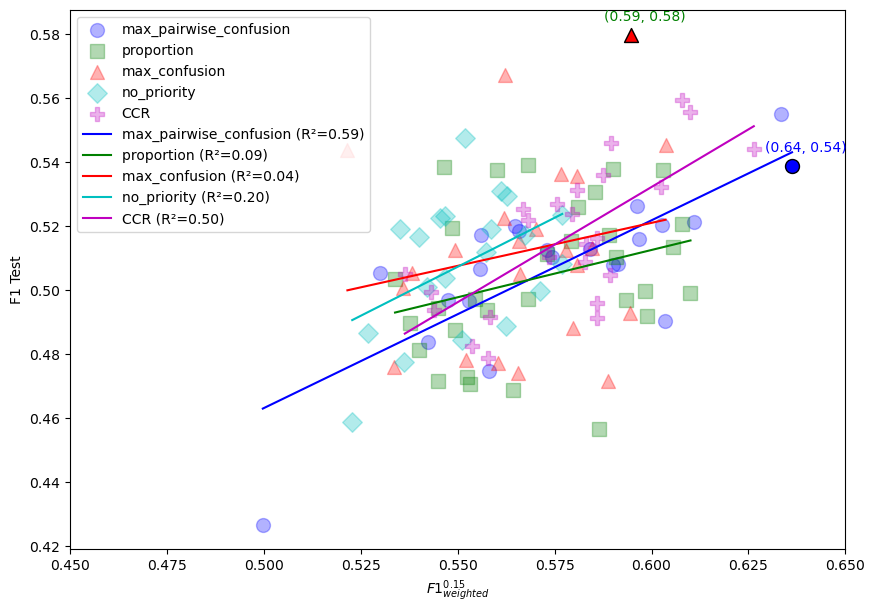

In [93]:
# Create scatter plot with seaborn and fixed symbols and colors
plt.figure(figsize=(10, 7))

# Plot scatter plot with fixed styles
for method, style in method_styles.items():
    subset = df[df['ranking_method'] == method]
    plt.scatter(subset['f1_val'], subset['f1_test'], label=method, marker=style['marker'], color=style['color'], s=100, alpha=0.3)

# Add regression lines and R^2 values
for method, style in method_styles.items():
    subset = df[df['ranking_method'] == method]
    if not subset.empty:
        X = subset['f1_val'].values.reshape(-1, 1)
        y = subset['f1_test'].values

        # Fit regression model
        reg = LinearRegression().fit(X, y)
        y_pred = reg.predict(X)
        r2 = r2_score(y, y_pred)

        # Plot regression line
        sns.lineplot(x=subset['f1_val'], y=y_pred, label=f'{method} (R²={r2:.2f})', color=style['color'])

# Find and mark the best points
best_f1_val_idx = df['f1_val'].idxmax()
best_f1_test_idx = df['f1_test'].idxmax()

# Mark the best points with the original symbol and alpha set to 1
best_val_point = df.loc[best_f1_val_idx]
best_test_point = df.loc[best_f1_test_idx]

plt.scatter([best_val_point['f1_val']], [best_val_point['f1_test']],
            marker=method_styles[best_val_point['ranking_method']]['marker'],
            color=method_styles[best_val_point['ranking_method']]['color'],
            s=100, alpha=1, edgecolor='k', linewidth=1)

plt.scatter([best_test_point['f1_val']], [best_test_point['f1_test']],
            marker=method_styles[best_test_point['ranking_method']]['marker'],
            color=method_styles[best_test_point['ranking_method']]['color'],
            s=100, alpha=1, edgecolor='k', linewidth=1)

# Annotate the best points
plt.annotate(f"({best_val_point['f1_val']:.2f}, {best_val_point['f1_test']:.2f})",
             (best_val_point['f1_val'], best_val_point['f1_test']),
             textcoords="offset points", xytext=(10,10), ha='center', color='b')

plt.annotate(f"({best_test_point['f1_val']:.2f}, {best_test_point['f1_test']:.2f})",
             (best_test_point['f1_val'], best_test_point['f1_test']),
             textcoords="offset points", xytext=(10,10), ha='center', color='g')

plt.xlim(0.45, 0.65)
plt.xlabel(xaxisname)
plt.ylabel('F1 Test')
plt.legend()
plt.savefig(filename+'.png')
plt.show()

In [29]:
res.sort_values('f1_val')

,f1_val,f1_test,ranking_method
95,0.473783,0.494398,proportion
30,0.512105,0.489246,max_confusion
78,0.514591,0.516218,max_confusion
93,0.515372,0.520767,proportion
98,0.516090,0.488996,max_pairwise_confusion
...,...,...,...
8,0.622756,0.545518,max_confusion
66,0.624060,0.506464,proportion
64,0.626127,0.553012,max_pairwise_confusion
4,0.630248,0.519068,proportion


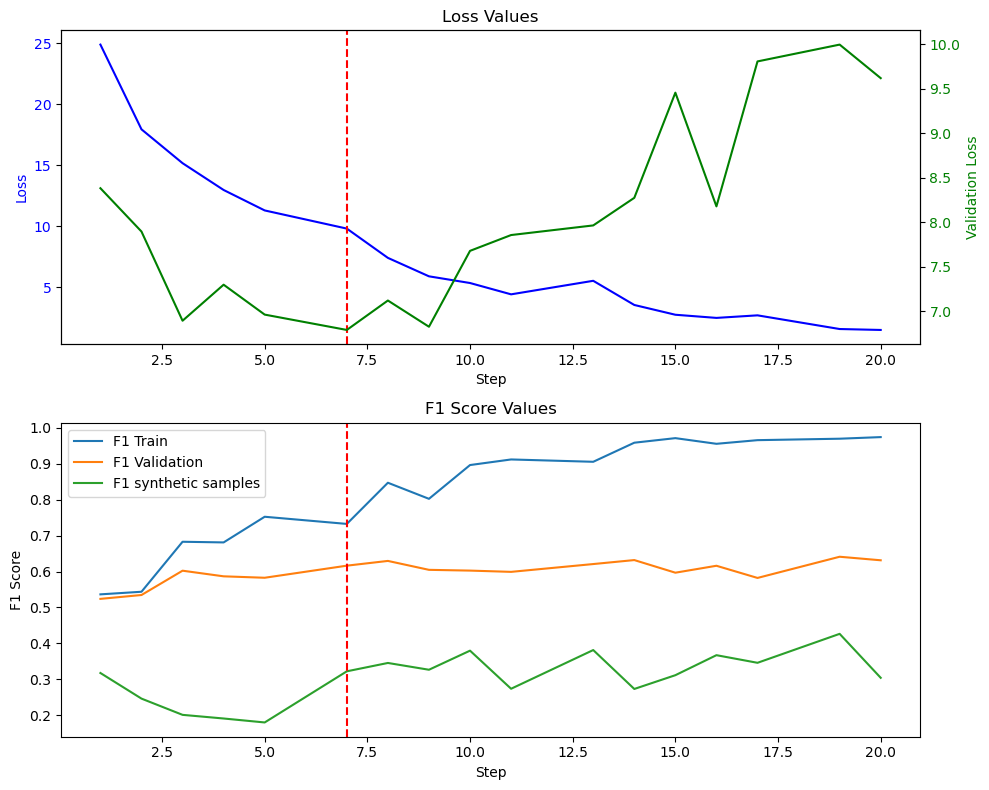

In [46]:
data = pd.read_csv('convergence_100_hs_fw03.csv')
data.columns = ['Step', 'loss', 'val_loss', 'synthetic_loss', 'f1_train', 'f1_val', 'f1_synthetic', 'patience']

# Determine the step with the best patience value
best_patience_step = 7
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot for loss values with dual y-axis
ax1.plot(df['Step'], df['loss'], label='Loss', color='b')
ax1.set_xlabel('Step')
ax1.set_ylabel('Loss', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax3 = ax1.twinx()
ax3.plot(df['Step'], df['val_loss'], label='Validation Loss', color='g')
ax3.set_ylabel('Validation Loss', color='g')
ax3.tick_params(axis='y', labelcolor='g')

ax1.axvline(x=best_patience_step, color='r', linestyle='--', label='Patience = 0')
ax1.set_title('Loss Values')


# Plot for f1_score values
ax2.plot(df['Step'], df['f1_train'], label='F1 Train')
ax2.plot(df['Step'], df['f1_val'], label='F1 Validation')
ax2.plot(df['Step'], df['f1_synthetic'], label='F1 synthetic samples')

ax2.axvline(x=best_patience_step, color='r', linestyle='--')
ax2.set_title('F1 Score Values')
ax2.set_xlabel('Step')
ax2.set_ylabel('F1 Score')
ax2.legend()

plt.tight_layout()

plt.savefig('Training.png')
plt.show()

In [100]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(solver="liblinear").fit(X, y)
print(y)
print(clf.predict_proba(X))
roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[8.78030305e-01 1.21958900e-01 1.07949250e-05]
 [7.97058292e-01 2.02911413e-01 3.02949242e-05]
 [8.51997665e-01 1.47976480e-01 2.58550858e-05]
 [8.23406019e-01 1.76536159e-01 5.78217704e-05]
 [8.96034973e-01 1.03953836e-01 1.11907339e-05]
 [9.26234254e-01 7.37527845e-02 1.29612594e-05]
 [8.94096848e-01 1.05863935e-01 3.92166195e-05]
 [8.60034410e-01 1.39946715e-01 1.88751124e-05]
 [8.01028643e-01 1.98886755e-01 8.46025595e-05]
 [7.92662392e-01 2.07312003e-01 2.56051563e-05]
 [8.90486112e-01 1.09507726e-01 6.16178069e-06]
 [8.61800668e-01 1.38164963e-01 3.43688884e-05]
 [7.85364369e-01 2.14608265e-01 2.73660893e-05]
 [8.33122325e-01 1.66845600e-01 3.20746459e-05]
 [9.27105079e-01 7.289

0.9913333333333334

array([3.93157374e-15, 2.21690071e-08, 4.81860186e-08, 5.20923574e-01,
       9.71079564e-06, 2.07273032e-01, 9.83863769e-07, 1.85901769e-02,
       9.63992182e-02, 3.68727195e-03, 2.50176080e-03, 1.57006004e-05,
       1.22554584e-05, 7.15851970e-01, 2.19506252e-01, 7.19533678e-04,
       3.93390125e-04, 1.00599900e-05, 2.47188234e-16, 9.76481365e-01,
       9.94299055e-01, 9.99664009e-01, 3.64405274e-02, 1.71729015e-16,
       4.97755087e-16, 6.51762974e-08, 2.17051050e-02, 1.97377596e-05,
       4.21338670e-07, 6.28453241e-03, 3.62887463e-10, 1.85875138e-04,
       8.20768830e-06, 2.45574467e-09, 2.25751340e-04, 4.38306874e-04,
       1.10099299e-01, 9.99916747e-01, 6.16964354e-01, 5.87850567e-01,
       4.90048981e-01, 4.39888229e-01, 3.94489748e-10, 2.21042109e-02,
       6.24873305e-01, 2.01983110e-06, 9.98048793e-01, 2.82259532e-01,
       9.80678241e-01, 8.65838347e-01, 9.89898158e-01, 9.95648323e-01,
       9.97441874e-01, 6.98587835e-05, 1.53288439e-02, 9.94555476e-01,
      